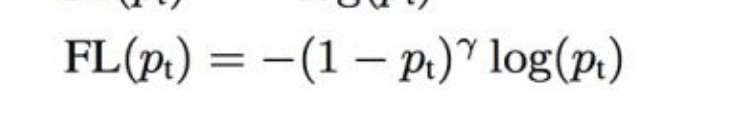

In [1]:
import torch
import torch.nn as nn
 
class DiceLoss(nn.Module):
    def __init__(self):
        super(DiceLoss, self).__init__()

    def	forward(self, input, target):
        N = target.size(0)
        smooth = 1

        input_flat = input.view(N, -1)
        target_flat = target.view(N, -1)

        intersection = input_flat * target_flat

        loss = 2 * (intersection.sum(1) + smooth) / (input_flat.sum(1) + target_flat.sum(1) + smooth)
        loss = 1 - loss.sum() / N

        return loss
 

class MulticlassDiceLoss(nn.Module):
    """
    requires one hot encoded target. Applies DiceLoss on each class iteratively.
    requires input.shape[0:1] and target.shape[0:1] to be (N, C) where N is
      batch size and C is number of classes
    """
    def __init__(self):
        super(MulticlassDiceLoss, self).__init__(weights):
        self.weights = weights

    def forward(self, input, target, weights=None):

        C = target.shape[1]

        if weights is None:
            weights = torch.ones(C) #uniform weights for all classes
        else:
            weights = 
        dice = DiceLoss()
        totalLoss = 0

        for i in range(C):
            diceLoss = dice(input[:,i], target[:,i])
            if weights is not None:
                diceLoss *= weights[i]
            totalLoss += diceLoss

        return totalLoss
